<a href="https://colab.research.google.com/github/Hoperablack/UK_Railway_Analysis/blob/main/Railway.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
file_path = '/content/drive/MyDrive/DataSet/railway.csv'
Railway_Data = pd.read_csv(file_path)
Railway_Data.head()

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,Arrival Destination,Date of Journey,Departure Time,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,Liverpool Lime Street,2024-01-01,11:00:00,13:30:00,13:30:00,On Time,NaN,No
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,York,2024-01-01,09:45:00,11:35:00,11:40:00,Delayed,Signal Failure,No
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,Manchester Piccadilly,2024-01-02,18:15:00,18:45:00,18:45:00,On Time,NaN,No
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,Reading,2024-01-01,21:30:00,22:30:00,22:30:00,On Time,NaN,No
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,London Euston,2024-01-01,16:45:00,19:00:00,19:00:00,On Time,NaN,No


In [ ]:
Railway_Data.info

<bound method DataFrame.info of                 Transaction ID Date of Purchase Time of Purchase  \
0      da8a6ba8-b3dc-4677-b176       2023-12-08         12:41:11   
1      b0cdd1b0-f214-4197-be53       2023-12-16         11:23:01   
2      f3ba7a96-f713-40d9-9629       2023-12-19         19:51:27   
3      b2471f11-4fe7-4c87-8ab4       2023-12-20         23:00:36   
4      2be00b45-0762-485e-a7a3       2023-12-27         18:22:56   
...                        ...              ...              ...   
31648  1304623d-b8b7-4999-8e9c       2024-04-30         18:42:58   
31649  7da22246-f480-417c-bc2f       2024-04-30         18:46:10   
31650  add9debf-46c1-4c75-b52d       2024-04-30         18:56:41   
31651  b92b047c-21fd-4859-966a       2024-04-30         19:51:47   
31652  1d5d89a2-bde5-410f-8f91       2024-04-30         20:05:39   

      Purchase Type Payment Method Railcard Ticket Class Ticket Type  Price  \
0            Online    Contactless    Adult     Standard     Advance     43   
1           Station    Credit Card    Adult     Standard     Advance     23   
2            Online    Credit Card      NaN     Standard     Advance      3   
3           Station    Credit Card      NaN     Standard     Advance     13   
4            Online    Contactless      NaN     Standard     Advance     76   
...             ...            ...      ...          ...         ...    ...   
31648        Online    Credit Card      NaN     Standard    Off-Peak      4   
31649        Online    Contactless      NaN     Standard    Off-Peak     10   
31650       Station    Credit Card      NaN     Standard    Off-Peak      4   
31651       Station    Credit Card      NaN     Standard    Off-Peak     10   
31652       Station    Credit Card    Adult     Standard    Off-Peak      3   

           Departure Station    Arrival Destination Date of Journey  \
0          London Paddington  Liverpool Lime Street      2024-01-01   
1         London Kings Cross                   York      2024-01-01   
2      Liverpool Lime Street  Manchester Piccadilly      2024-01-02   
3          London Paddington                Reading      2024-01-01   
4      Liverpool Lime Street          London Euston      2024-01-01   
...                      ...                    ...             ...   
31648  Manchester Piccadilly  Liverpool Lime Street      2024-04-30   
31649          London Euston  Birmingham New Street      2024-04-30   
31650  Manchester Piccadilly  Liverpool Lime Street      2024-04-30   
31651          London Euston  Birmingham New Street      2024-04-30   
31652  Liverpool Lime Street  Manchester Piccadilly      2024-04-30   

      Departure Time Arrival Time Actual Arrival Time Journey Status  \
0           11:00:00     13:30:00            13:30:00        On Time   
1           09:45:00     11:35:00            11:40:00        Delayed   
2           18:15:00     18:45:00            18:45:00        On Time   
3           21:30:00     22:30:00            22:30:00        On Time   
4           16:45:00     19:00:00            19:00:00        On Time   
...              ...          ...                 ...            ...   
31648       20:00:00     20:30:00            20:30:00        On Time   
31649       20:15:00     21:35:00            21:35:00        On Time   
31650       20:15:00     20:45:00            20:45:00        On Time   
31651       21:15:00     22:35:00            22:35:00        On Time   
31652       21:30:00     22:00:00            22:00:00        On Time   

      Reason for Delay Refund Request  
0                  NaN             No  
1       Signal Failure             No  
2                  NaN             No  
3                  NaN             No  
4                  NaN             No  
...                ...            ...  
31648              NaN             No  
31649              NaN             No  
31650              NaN             No  
31651              NaN             No  
31652              NaN             No  

[31

In [ ]:
Railway_Data.describe()

,Price
count,31653.000000
mean,23.439200
std,29.997628
min,1.000000
25%,5.000000
50%,11.000000
75%,35.000000
max,267.000000


### Revenue Trends:
### How do revenues (based on ticket prices) vary over time (e.g., monthly, weekly)?


In [ ]:
Railway_Data['Date of Purchase'] = pd.to_datetime(Railway_Data['Date of Purchase'])

In [ ]:
Railway_Data['Year'] = Railway_Data['Date of Purchase'].dt.year
Railway_Data['Month'] = Railway_Data['Date of Purchase'].dt.month
Railway_Data['Week'] = Railway_Data['Date of Purchase'].dt.isocalendar().week
Railway_Data['Day'] = Railway_Data['Date of Purchase'].dt.day

In [ ]:
monthly_revenue = Railway_Data.groupby(['Year', 'Month'])['Price'].sum().reset_index()
monthly_revenue['Month-Year'] = monthly_revenue['Year'].astype(str) + '-' + monthly_revenue['Month'].astype(str)
monthly_revenue

,Year,Month,Price,Month-Year
0,2023,12,692,2023-12
1,2024,1,205091,2024-1
2,2024,2,154118,2024-2
3,2024,3,194789,2024-3
4,2024,4,187231,2024-4


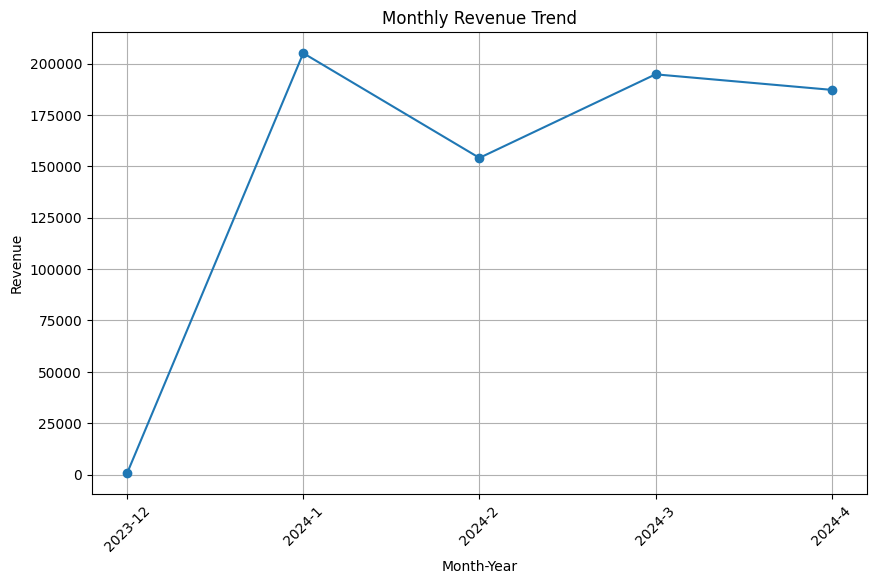

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['Month-Year'], monthly_revenue['Price'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Monthly Revenue Trend')
plt.xlabel('Month-Year')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

In [ ]:
weekly_revenue = Railway_Data.groupby(['Year', 'Week'])['Price'].sum().reset_index()
weekly_revenue

,Year,Week,Price
0,2023,49,43
1,2023,50,23
2,2023,51,16
3,2023,52,610
4,2024,1,39713
5,2024,2,46807
6,2024,3,46946
7,2024,4,48566
8,2024,5,58191
9,2024,6,56029


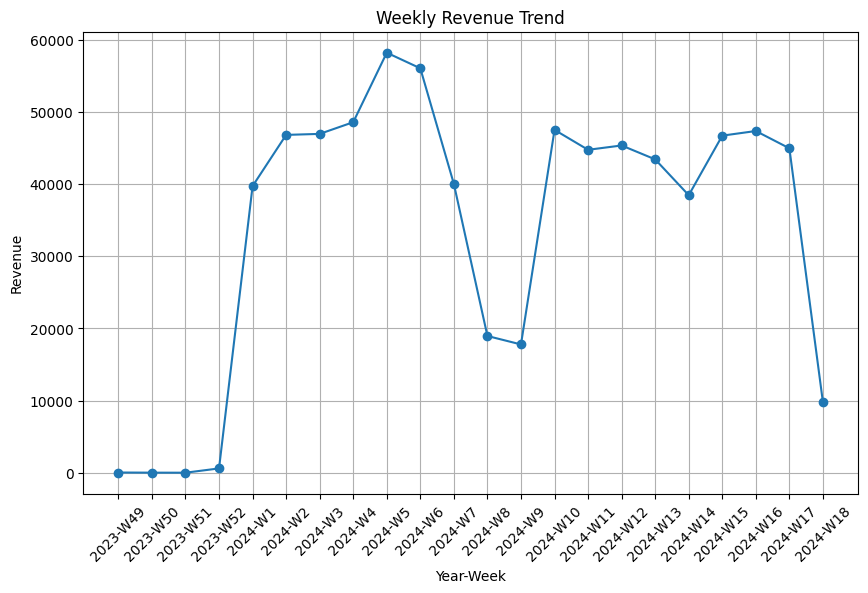

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_revenue['Year'].astype(str) + '-W' + weekly_revenue['Week'].astype(str), weekly_revenue['Price'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title('Weekly Revenue Trend')
plt.xlabel('Year-Week')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

###Top Routes:
###What are the top departure and arrival stations by revenue and the number of tickets sold?

In [ ]:
Railway_Data['Route'] = Railway_Data['Departure Station'] + ' -> ' + Railway_Data['Arrival Destination']
Railway_Data

,Transaction ID,Date of Purchase,Time of Purchase,Purchase Type,Payment Method,Railcard,Ticket Class,Ticket Type,Price,Departure Station,...,Arrival Time,Actual Arrival Time,Journey Status,Reason for Delay,Refund Request,Year,Month,Week,Day,Route
0,da8a6ba8-b3dc-4677-b176,2023-12-08,12:41:11,Online,Contactless,Adult,Standard,Advance,43,London Paddington,...,13:30:00,13:30:00,On Time,NaN,No,2023,12,49,8,London Paddington -> Liverpool Lime Street
1,b0cdd1b0-f214-4197-be53,2023-12-16,11:23:01,Station,Credit Card,Adult,Standard,Advance,23,London Kings Cross,...,11:35:00,11:40:00,Delayed,Signal Failure,No,2023,12,50,16,London Kings Cross -> York
2,f3ba7a96-f713-40d9-9629,2023-12-19,19:51:27,Online,Credit Card,NaN,Standard,Advance,3,Liverpool Lime Street,...,18:45:00,18:45:00,On Time,NaN,No,2023,12,51,19,Liverpool Lime Street -> Manchester Piccadilly
3,b2471f11-4fe7-4c87-8ab4,2023-12-20,23:00:36,Station,Credit Card,NaN,Standard,Advance,13,London Paddington,...,22:30:00,22:30:00,On Time,NaN,No,2023,12,51,20,London Paddington -> Reading
4,2be00b45-0762-485e-a7a3,2023-12-27,18:22:56,Online,Contactless,NaN,Standard,Advance,76,Liverpool Lime Street,...,19:00:00,19:00:00,On Time,NaN,No,2023,12,52,27,Liverpool Lime Street -> London Euston
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31648,1304623d-b8b7-4999-8e9c,2024-04-30,18:42:58,Online,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,...,20:30:00,20:30:00,On Time,NaN,No,2024,4,18,30,Manchester Piccadilly -> Liverpool Lime Street
31649,7da22246-f480-417c-bc2f,2024-04-30,18:46:10,Online,Contactless,NaN,Standard,Off-Peak,10,London Euston,...,21:35:00,21:35:00,On Time,NaN,No,2024,4,18,30,London Euston -> Birmingham New Street
31650,add9debf-46c1-4c75-b52d,2024-04-30,18:56:41,Station,Credit Card,NaN,Standard,Off-Peak,4,Manchester Piccadilly,...,20:45:00,20:45:00,On Time,NaN,No,2024,4,18,30,Manchester Piccadilly -> Liverpool Lime Street
31651,b92b047c-21fd-4859-966a,2024-04-30,19:51:47,Station,Credit Card,NaN,Standard,Off-Peak,10,London Euston,...,22:35:00,22:35:00,On Time,NaN,No,2024,4,18,30,London Euston -> Birmingham New Street


In [ ]:
Route_revenue = Railway_Data.groupby('Route').agg(Total_Revenue=('Price', 'sum'),Tickets_Sold=('Route', 'count')).reset_index()

In [ ]:
Top_routes_by_revenue = Route_revenue.sort_values(by='Total_Revenue', ascending=False).head(10)
Top_routes_by_revenue

,Route,Total_Revenue,Tickets_Sold
30,London Kings Cross -> York,183193,3922
19,Liverpool Lime Street -> London Euston,113299,1097
35,London Paddington -> Reading,65368,3873
25,London Euston -> Manchester Piccadilly,61004,712
36,London St Pancras -> Birmingham New Street,52869,3471
24,London Euston -> Birmingham New Street,50349,4209
41,Manchester Piccadilly -> London Euston,33860,345
6,Birmingham New Street -> London St Pancras,19011,702
40,Manchester Piccadilly -> Liverpool Lime Street,17310,4628
43,Manchester Piccadilly -> London Paddington,16432,144


In [ ]:
Top_route_by_ticket = Route_revenue.sort_values(by='Tickets_Sold', ascending=False).head(10)
Top_route_by_ticket


,Route,Total_Revenue,Tickets_Sold
40,Manchester Piccadilly -> Liverpool Lime Street,17310,4628
24,London Euston -> Birmingham New Street,50349,4209
30,London Kings Cross -> York,183193,3922
35,London Paddington -> Reading,65368,3873
36,London St Pancras -> Birmingham New Street,52869,3471
22,Liverpool Lime Street -> Manchester Piccadilly,11950,3002
19,Liverpool Lime Street -> London Euston,113299,1097
25,London Euston -> Manchester Piccadilly,61004,712
6,Birmingham New Street -> London St Pancras,19011,702
34,London Paddington -> Oxford,12859,485


### Purchase Behavior:
###What is the distribution of ticket purchases by type (e.g., Advance, Anytime)?


In [ ]:
Ticket_type_distribution = Railway_Data['Ticket Type'].value_counts().reset_index()
Ticket_type_distribution.columns = ['Ticket Types','Count']
Ticket_type_distribution

,Ticket Types,Count
0,Advance,17561
1,Off-Peak,8752
2,Anytime,5340


In [ ]:
Ticket_type_distribution['Percentage'] = (Ticket_type_distribution['Count'] / Ticket_type_distribution['Count'].sum()) * 100
Ticket_type_distribution

,Ticket Types,Count,Percentage
0,Advance,17561,55.479733
1,Off-Peak,8752,27.649828
2,Anytime,5340,16.870439


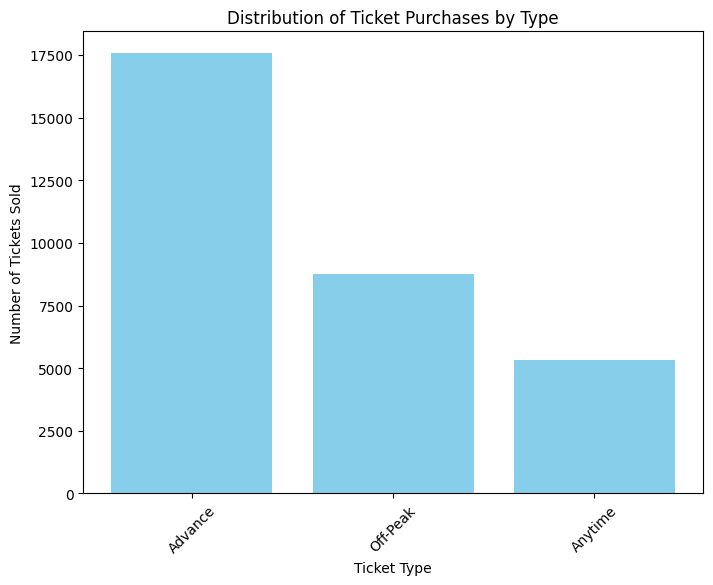

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(Ticket_type_distribution['Ticket Types'], Ticket_type_distribution['Count'], color='skyblue')
plt.title('Distribution of Ticket Purchases by Type')
plt.xlabel('Ticket Type')
plt.ylabel('Number of Tickets Sold')
plt.xticks(rotation=45)
plt.show()

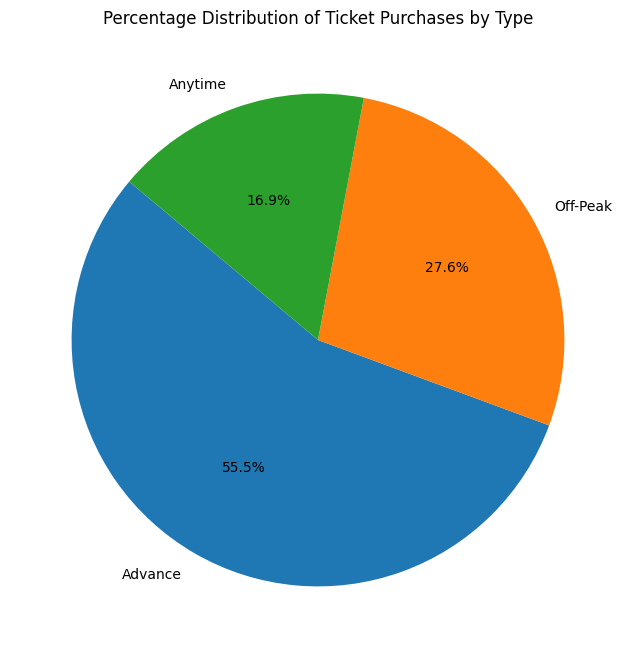

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(Ticket_type_distribution['Count'], labels=Ticket_type_distribution['Ticket Types'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Ticket Purchases by Type')
plt.show()

### Popular Ticket Classes:
### How do sales compare across different ticket classes (e.g., Standard, First)?

In [ ]:
Ticket_class_distribution = Railway_Data ['Ticket Class'].value_counts().reset_index()
Ticket_class_distribution.columns = ['Ticket Class', 'Count']
Ticket_class_distribution

,Ticket Class,Count
0,Standard,28595
1,First Class,3058


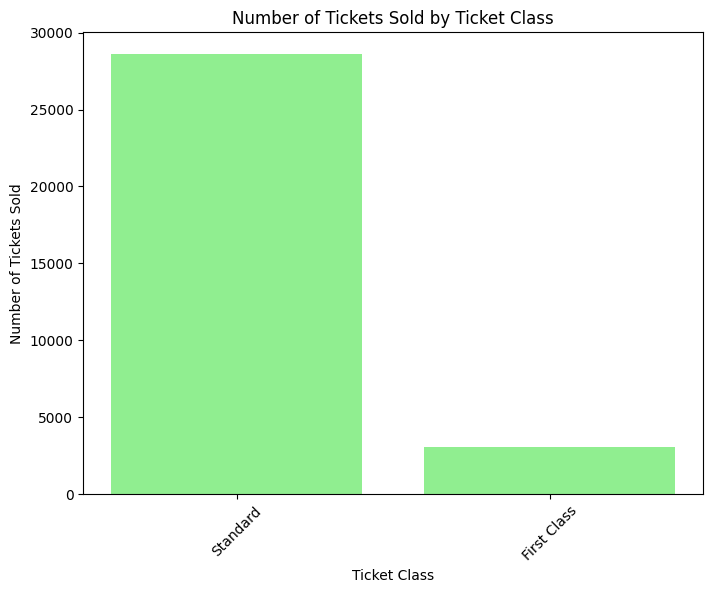

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(Ticket_class_distribution['Ticket Class'], Ticket_class_distribution['Count'], color='lightgreen')
plt.title('Number of Tickets Sold by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Number of Tickets Sold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Ticket_class_revenue = Railway_Data.groupby('Ticket Class')['Price'].sum().reset_index()
Ticket_class_revenue.columns = ['Ticket Class', 'Total Revenue']
Ticket_class_revenue

,Ticket Class,Total Revenue
0,First Class,149399
1,Standard,592522


([0, 1], [Text(0, 0, 'First Class'), Text(1, 0, 'Standard')])

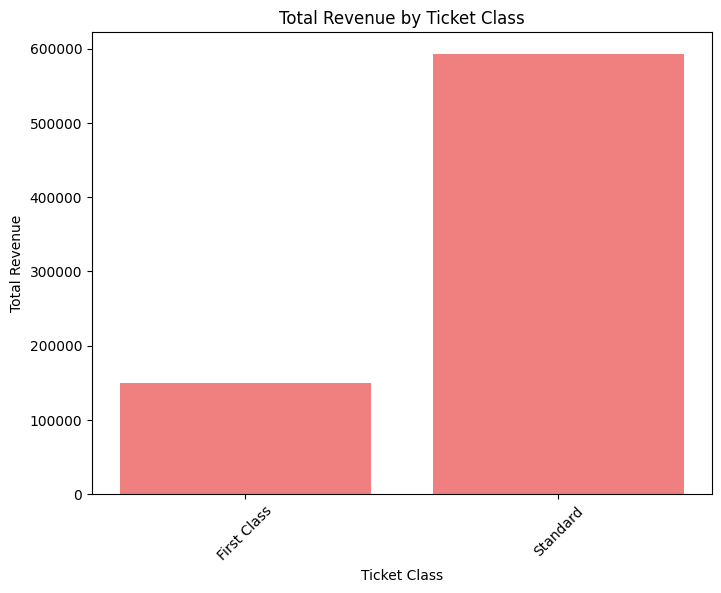

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(Ticket_class_revenue['Ticket Class'], Ticket_class_revenue['Total Revenue'], color='lightcoral')
plt.title('Total Revenue by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

###Customer Behavior:

###Purchase Channels:
###What percentage of tickets are purchased online versus at stations?

In [ ]:
Purchase_channel_distribution = Railway_Data['Purchase Type'].value_counts().reset_index()
Purchase_channel_distribution.columns = ['Purchase Type', 'Count']
Purchase_channel_distribution

,Purchase Type,Count
0,Online,18521
1,Station,13132


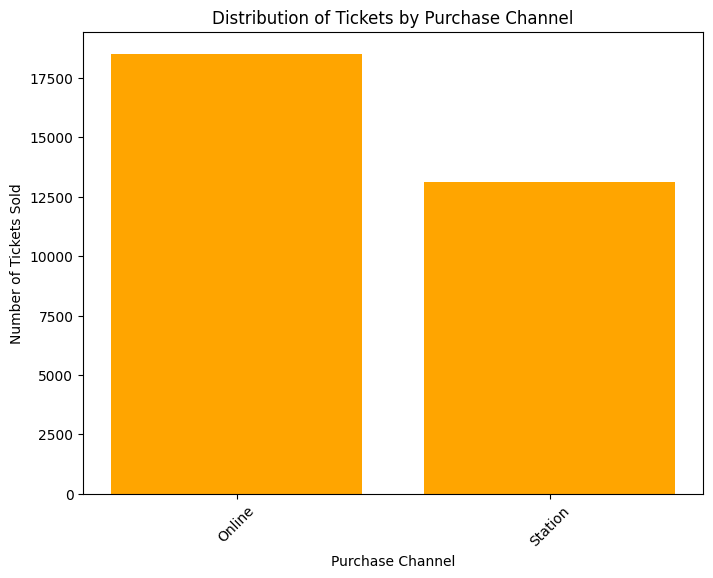

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(Purchase_channel_distribution['Purchase Type'], Purchase_channel_distribution['Count'], color='Orange')
plt.title('Distribution of Tickets by Purchase Channel')
plt.xlabel('Purchase Channel')
plt.ylabel('Number of Tickets Sold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Purchase_channel_distribution['Percentage'] = (Purchase_channel_distribution['Count'] / Purchase_channel_distribution['Count'].sum()) * 100
Purchase_channel_distribution

,Purchase Type,Count,Percentage
0,Online,18521,58.512621
1,Station,13132,41.487379


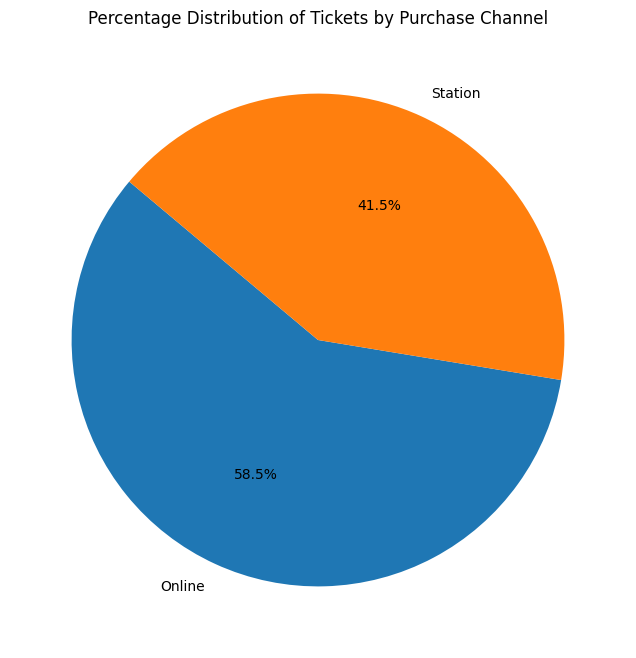

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(Purchase_channel_distribution['Count'], labels=Purchase_channel_distribution['Purchase Type'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Tickets by Purchase Channel')
plt.show()

###Payment Methods:
###What are the most common payment methods used for ticket purchases?

In [ ]:
Payment_method_distribution = Railway_Data['Payment Method'].value_counts().reset_index()
Payment_method_distribution.columns = ['Payment Method', 'Count']
Payment_method_distribution

,Payment Method,Count
0,Credit Card,19136
1,Contactless,10834
2,Debit Card,1683


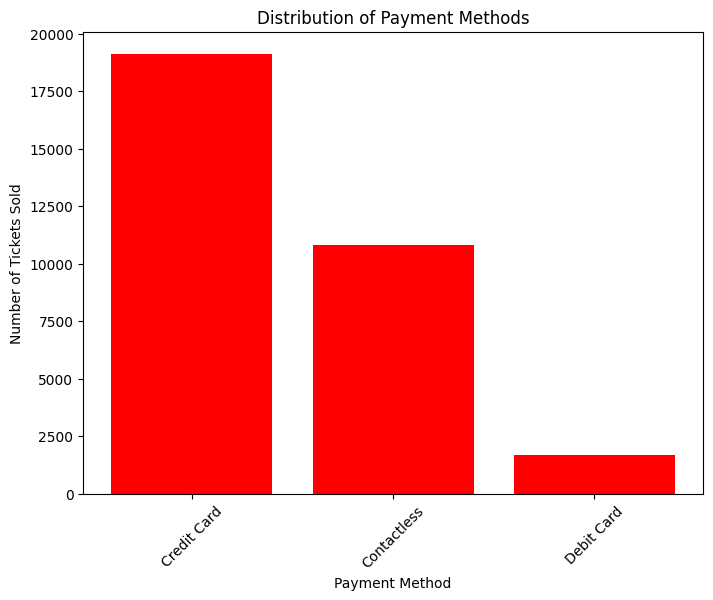

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(Payment_method_distribution['Payment Method'], Payment_method_distribution['Count'], color='red')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Tickets Sold')
plt.xticks(rotation=45)
plt.show()

In [ ]:
Payment_method_distribution['Percentage'] = (Payment_method_distribution['Count'] / Payment_method_distribution['Count'].sum()) * 100
Payment_method_distribution

,Payment Method,Count,Percentage
0,Credit Card,19136,60.455565
1,Contactless,10834,34.227403
2,Debit Card,1683,5.317032


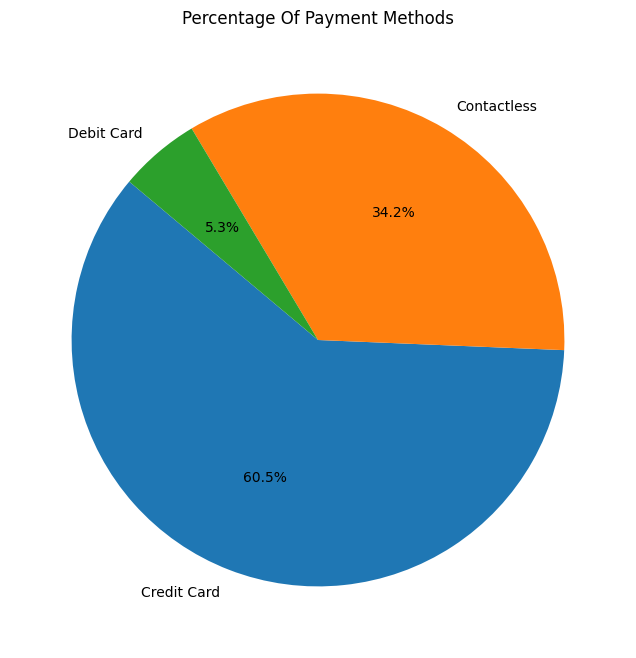

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(Payment_method_distribution['Count'], labels=Payment_method_distribution['Payment Method'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Of Payment Methods')
plt.show()

###Railcard Usage:
###How often do customers use railcards, and what types of railcards are most popular?

In [ ]:
Cust_Railcard = Railway_Data['Railcard'].value_counts().reset_index()
Cust_Railcard.columns = ['Railcard', 'Count']
Cust_Railcard

,Railcard,Count
0,Adult,4846
1,Disabled,3089
2,Senior,2800


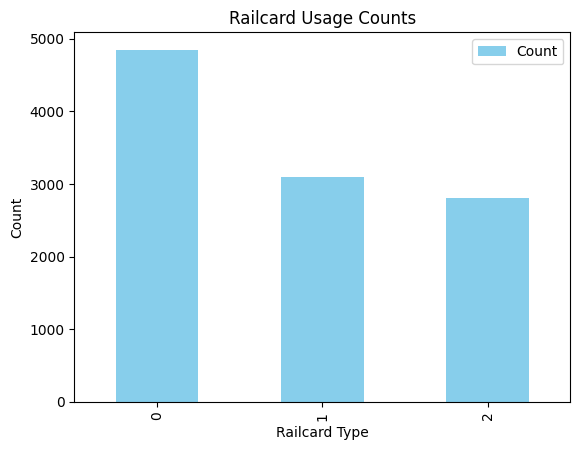

In [37]:
Cust_Railcard.plot(kind='bar', color='skyblue')
plt.title('Railcard Usage Counts')
plt.xlabel('Railcard Type')
plt.ylabel('Count')
plt.show()

###Operational Performance:


###Punctuality:
###What percentage of trains arrive on time? Which routes or stations have the most delays?

In [42]:
on_time_percentage = (Railway_Data['Journey Status'] == 'On Time').mean() * 100
on_time_percentage

86.81957476384545

In [44]:
delayed_routes = delayed_trains.groupby(['Departure Station', 'Arrival Destination']).size().sort_values(ascending=False)
delayed_routes

,,0
Departure Station,Arrival Destination,
Liverpool Lime Street,London Euston,780
Manchester Piccadilly,Liverpool Lime Street,354
London Euston,Birmingham New Street,242
Manchester Piccadilly,London Euston,240
London Kings Cross,York,131
Liverpool Lime Street,Manchester Piccadilly,107
Birmingham New Street,Manchester Piccadilly,96
London Paddington,Reading,66
Manchester Piccadilly,Leeds,64


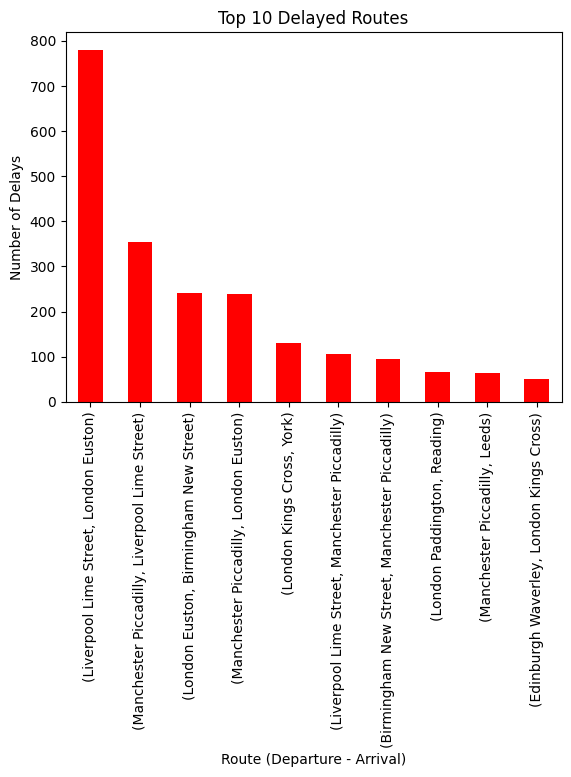

In [47]:
delayed_routes.head(10).plot(kind='bar', color='red')
plt.title('Top 10 Delayed Routes')
plt.xlabel('Route (Departure - Arrival)')
plt.ylabel('Number of Delays')
plt.show()

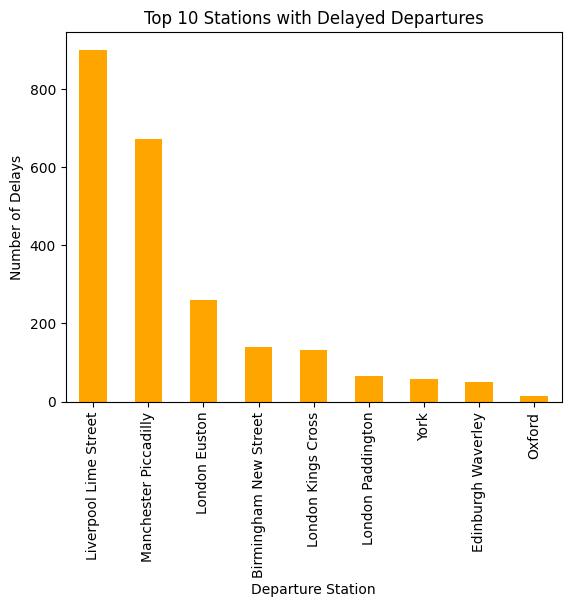

In [48]:
delayed_departures.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Stations with Delayed Departures')
plt.xlabel('Departure Station')
plt.ylabel('Number of Delays')
plt.show()

###Delay Causes:
###What are the most common reasons for delays?


In [50]:
Delay_reasons = Railway_Data['Reason for Delay'].value_counts().reset_index()
Delay_reasons.columns = ['Reason for Delay', 'Count']
Delay_reasons

,Reason for Delay,Count
0,Weather,995
1,Technical Issue,707
2,Signal Failure,523
3,Signal failure,447
4,Staffing,410
5,Staff Shortage,399
6,Weather Conditions,377
7,Traffic,314


###Refund Requests:
###How many refund requests are made, and what are the most common reasons? Is there a correlation between delays and refund requests?



In [55]:
refund_requests = Railway_Data['Refund Request'].value_counts().reset_index()
refund_requests

,Refund Request,count
0,No,30535
1,Yes,1118


In [63]:
refund_requests = Railway_Data[Railway_Data['Refund Request'] == 'Yes']
refund_reasons = refund_requests['Reason for Delay'].value_counts().reset_index()
refund_reasons.columns = ['Reason for Delay', 'Count']
refund_reasons

,Reason for Delay,Count
0,Technical Issue,388
1,Staffing,182
2,Traffic,121
3,Signal Failure,110
4,Signal failure,105
5,Staff Shortage,79
6,Weather,69
7,Weather Conditions,64


In [70]:
delayed_refunds = Railway_Data[(Railway_Data['Journey Status'] == 'Delayed') & (Railway_Data['Refund Request'] == 'Yes')].shape[0]
delayed_refunds

546

In [69]:
total_delayed = Railway_Data[Railway_Data['Journey Status'] == 'Delayed'].shape[0]
total_delayed

2292

In [68]:
refund_delay_correlation = (delayed_refunds / total_delayed) * 100
refund_delay_correlation

23.82198952879581

###Customer Experience:

###Journey Status Analysis:
### How does the journey status (On Time vs. Delayed) impact customer satisfaction (as inferred from refund requests)?


In [72]:
on_time_data = Railway_Data[Railway_Data['Journey Status'] == 'On Time']
delayed_data = Railway_Data[Railway_Data['Journey Status'] == 'Delayed']

In [73]:
on_time_refund_count = on_time_data[on_time_data['Refund Request'] == 'Yes'].shape[0]
delayed_refund_count = delayed_data[delayed_data['Refund Request'] == 'Yes'].shape[0]

In [74]:
total_on_time = on_time_data.shape[0]
total_delayed = delayed_data.shape[0]

In [77]:
on_time_refund_percentage = (on_time_refund_count / total_on_time) * 100
on_time_refund_percentage

0.0

In [78]:
delayed_refund_percentage = (delayed_refund_count / total_delayed) * 100
delayed_refund_percentage

23.82198952879581